# Analysis of Generated Corpus

This notebook performs a quality check on the `large_corpus.txt` file generated by our script. The goal is to verify that the corpus exhibits properties of natural language before using it for further research.

**Analysis Steps:**
1.  **Load Corpus**: Read the generated text file.
2.  **Calculate Basic Statistics**: Compute total words and vocabulary size.
3.  **Analyze Frequency Distribution**: Calculate word frequencies and visualize them to check for properties like Zipf's Law.
4.  **Inspect Content**: Review the most and least frequent words as a sanity check.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

print("✅ Libraries imported.")

# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
print("✅ Plotting configured.")

✅ Libraries imported.
✅ Plotting configured.


## 1. Load Corpus and Calculate Basic Statistics
First, we load the `large_corpus.txt` file and perform basic text processing to calculate the total number of words (tokens) and the size of the vocabulary (unique words).

In [2]:
# Load the generated corpus
corpus_path = '../output/large_corpus.txt'
try:
    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus_text = f.read()
    print(f"✅ Corpus loaded successfully from '{corpus_path}'.")
except FileNotFoundError:
    print(f"❌ Error: '{corpus_path}' not found. Please ensure the generation script has been run.")
    corpus_text = ""

if corpus_text:
    # Remove metadata comments before processing
    # The DOTALL flag is crucial for multiline JSON
    cleaned_text = re.sub(r'<!-- Story Metadata:.*?-->', '', corpus_text, flags=re.DOTALL)
    
    # Tokenize the text into words using a simple regex
    # This finds sequences of word characters, converting to lowercase
    words = re.findall(r'\b\w+\b', cleaned_text.lower())
    
    # Calculate statistics
    total_words = len(words)
    unique_words = len(set(words))
    
    print("\n--- Corpus Statistics ---")
    print(f"Total Words (Tokens): {total_words:,}")
    print(f"Vocabulary Size (Unique Words): {unique_words:,}")
    print("-------------------------")

✅ Corpus loaded successfully from '../output/large_corpus.txt'.

--- Corpus Statistics ---
Total Words (Tokens): 1,347,430
Vocabulary Size (Unique Words): 38,939
-------------------------

--- Corpus Statistics ---
Total Words (Tokens): 1,347,430
Vocabulary Size (Unique Words): 38,939
-------------------------


## 2. Calculate and Visualize Word Frequency Distribution (Zipf's Law)
A key characteristic of natural language is that the frequency of any word is inversely proportional to its rank in the frequency table. When plotted on a log-log scale, this relationship should appear as a straight line. This is known as Zipf's Law and serves as an excellent quality check for our generated corpus.

Plotting the frequency distribution...


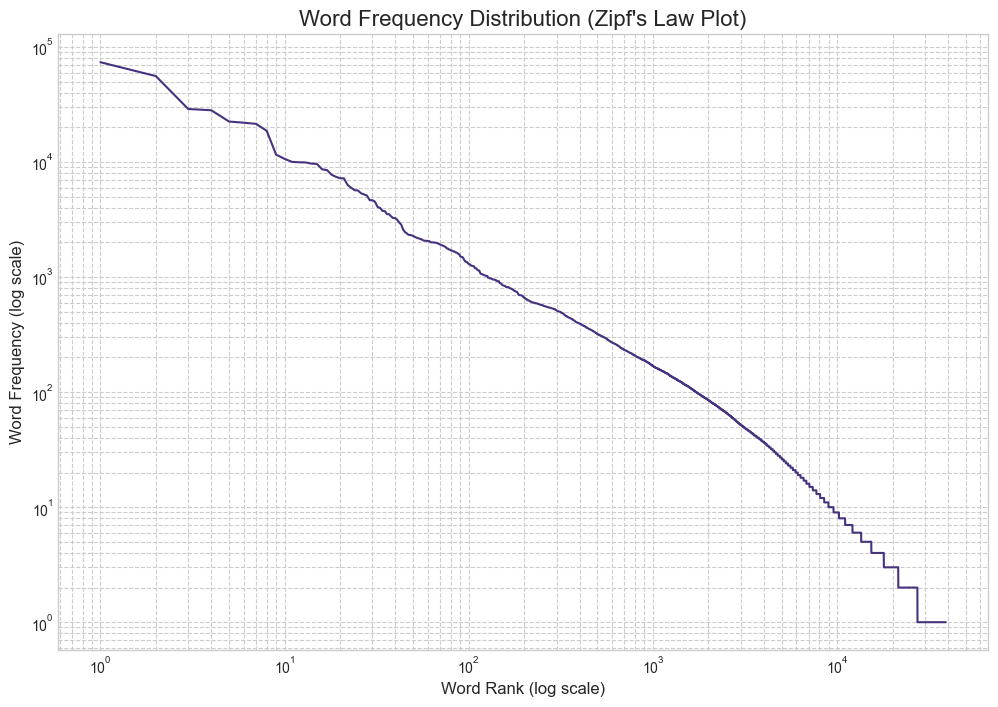

In [3]:
if 'words' in locals() and words:
    # Calculate word frequencies
    word_counts = Counter(words)
    
    # Get the frequencies and sort them in descending order
    frequencies = sorted(word_counts.values(), reverse=True)
    
    # Create ranks for the x-axis
    ranks = np.arange(1, len(frequencies) + 1)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.loglog(ranks, frequencies)
    plt.title("Word Frequency Distribution (Zipf's Law Plot)", fontsize=16)
    plt.xlabel("Word Rank (log scale)", fontsize=12)
    plt.ylabel("Word Frequency (log scale)", fontsize=12)
    plt.grid(True, which="both", ls="--")
    
    print("Plotting the frequency distribution...")
    plt.show()
else:
    print("⚠️ No words available to plot. Please run the previous cells.")

## 3. Inspect Most and Least Frequent Words
As a final sanity check, let's look at the most common and least common words. The most frequent should be common function words (e.g., 'the', 'a', 'is'). The least frequent words can give us an idea of the diversity and potential noise at the tail end of the distribution.

In [4]:
if 'word_counts' in locals():
    # Create a DataFrame for easier viewing
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
    freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    print("--- Top 20 Most Frequent Words ---")
    print(freq_df.head(20))
    print("\n" + "="*35 + "\n")
    
    # Words that appear only once
    single_occurrence_words = freq_df[freq_df['frequency'] == 1]
    
    print(f"--- {len(single_occurrence_words)} Words with a Single Occurrence (Hapax Legomena) ---")
    # Display a random sample if there are many
    if len(single_occurrence_words) > 20:
        print("(Showing a random sample of 20)")
        print(single_occurrence_words.sample(20))
    else:
        print(single_occurrence_words)
        
else:
    print("⚠️ Word counts not available. Please run previous cells.")


--- Top 20 Most Frequent Words ---
    word  frequency
0    the      73770
1      a      55888
2    and      28917
3     of      28204
4     to      22490
5     in      21982
6     it      21472
7      s      18697
8   like      11596
9   that      10659
10  with      10029
11   not       9952
12   but       9924
13     t       9692
14   you       9625
15    is       8645
16  your       8511
17    or       7765
18   for       7441
19  this       7237


--- 11651 Words with a Single Occurrence (Hapax Legomena) ---
(Showing a random sample of 20)
                   word  frequency
28065        lepidomeda          1
37334           carpets          1
35802           braised          1
33210            cramps          1
38247        insipience          1
38271              gaas          1
30415             fools          1
33814         scorecard          1
38658        progressed          1
34344          injected          1
32220              birr          1
38116          thinness      